### Seeding for reproducibility

In [17]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

### Importing dependencies

In [18]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models


### Data Preprocessing

In [19]:
# Dataset Path
base_dir = "D:\ML Project1\Plant Disease Prediction with CNN\plantvillage dataset\color"


(256, 256, 3)


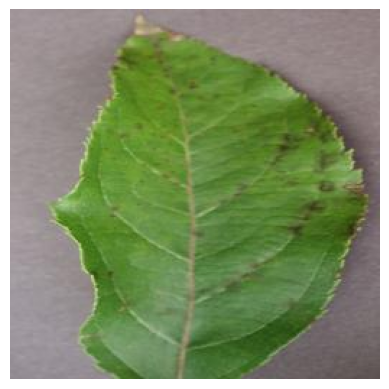

In [20]:
image_path = r"D:\ML Project1\Plant Disease Prediction with CNN\plantvillage dataset\color\Apple___Apple_scab\0a5e9323-dbad-432d-ac58-d291718345d9___FREC_Scab 3417.JPG"

# read the image
img = mpimg.imread(image_path)

print(img.shape)

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

In [21]:
# Image Parameters
img_size = 224   # Resize images to 224x224
batch_size = 32  # Number of images to process in a batch


### Train Test Split

In [22]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [23]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = (img_size, img_size),
    batch_size = batch_size,
    subset = 'training',
    class_mode = 'categorical'
)

Found 43456 images belonging to 38 classes.


In [24]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = (img_size, img_size),
    batch_size = batch_size,
    subset = 'training',
    class_mode = 'categorical'
)

Found 43456 images belonging to 38 classes.


### Convolution Neural Network

In [25]:
# Model Architecture
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation= 'relu', input_shape = (img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(train_generator.num_classes, activation= 'softmax'))


C:\Users\Aviral Goyal\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
# Model Summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Compile the Model
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

### Model Training

In [28]:
# Train the Model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,  # Number of training steps per epoch
    epochs = 5,   # Number of epochs to train
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size   # Number of validation steps per epoch
)

Epoch 1/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1826s 1s/step - accuracy: 0.7452 - loss: 0.9054 - val_accuracy: 0.9288 - val_loss: 0.2565
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1805s 1s/step - accuracy: 0.9165 - loss: 0.2608 - val_accuracy: 0.9497 - val_loss: 0.1521
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1556s 1s/step - accuracy: 0.9623 - loss: 0.1149 - val_accuracy: 0.9774 - val_loss: 0.0720
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1695s 1s/step - accuracy: 0.9737 - loss: 0.0824 - val_accuracy: 0.9786 - val_loss: 0.0671
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1934s 1s/step - accuracy: 0.9777 - loss: 0.0691 - val_accuracy: 0.9742 - val_loss: 0.0820


### Model Evaluation

In [31]:
# Model Evaluation
print("Evaluating the model on validation data...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")


Evaluating the model on validation data...
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 278s 205ms/step - accuracy: 0.9742 - loss: 0.0820
Validation Loss: 0.0820, Validation Accuracy: 0.9742


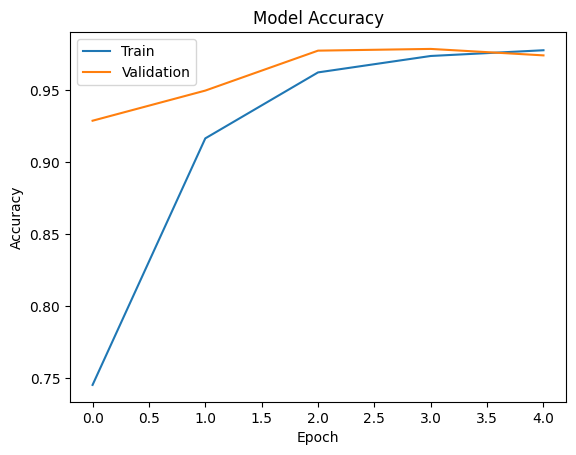

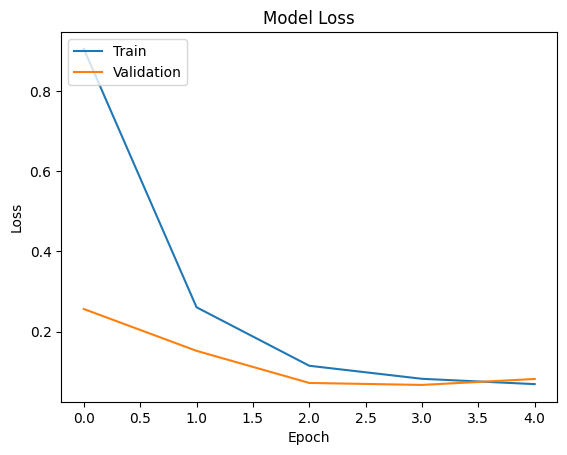

In [32]:
# Plot Training and validation Accuracy Values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation Loss Values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


### Building a Predictive System

In [33]:
# Function to Load and Preprocess Image ussing Pillow
def load_and_preprocess_image(image_path , target_size=(224,224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert image into numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0,1]
    img_array = img_array.astype('float32')/255.0
    return img_array

# Function to Predict the Class of the Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_image = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_image)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [34]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [35]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [36]:
# Saving the class name as json file
json.dump(class_indices, open('class_indices.json','w'))


In [37]:
# Example usage

image_path = r"D:\ML Project1\Plant Disease Prediction with CNN\test data\test_apple_black_rot.JPG"
#image_path = r"D:\ML Project1\Plant Disease Prediction with CNN\test data\test_blueberry_healthy.jpg"
#image_path = r"D:\ML Project1\Plant Disease Prediction with CNN\test data\test_potato_early_blight.jpg"

predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the predicted class name
print(f"The predicted class for the image is: {predicted_class_name}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
The predicted class for the image is: Apple___Black_rot
